In [1]:
# getting necessary imports
import numpy as np
import glob 


In [30]:
#Gathering all results here
P_tr = glob.glob(r'/projectnb/dl4ds/projects/dca_project/data/chest_xray/train/PNEUMONIA/*')
N_tr = glob.glob(r'/projectnb/dl4ds/projects/dca_project/data/chest_xray/train/NORMAL/*')

P_v = glob.glob(r'/projectnb/dl4ds/projects/dca_project/data/chest_xray/val/PNEUMONIA/*')
N_v = glob.glob(r'/projectnb/dl4ds/projects/dca_project/data/chest_xray/val/NORMAL/*')

P_te = glob.glob(r'/projectnb/dl4ds/projects/dca_project/data/chest_xray/test/PNEUMONIA/*')
N_te = glob.glob(r'/projectnb/dl4ds/projects/dca_project/data/chest_xray/test/NORMAL/*')

In [36]:
print("samples in train set, pneumonia: "+ str(len(P_tr)))
print("samples in train set, normal: "+ str(len(N_tr)))

print("samples in validation set, pneumonia: "+ str(len(N_v)))
print("samples in validation set, normal: "+ str(len(N_v)))

print("samples in test set, pneumonia: " + str(len(P_te)))
print("samples in test set, normal: " + str(len(N_te)))

samples in train set, pneumonia: 3875
samples in train set, normal: 1341
samples in validation set, pneumonia: 8
samples in validation set, normal: 8
samples in test set, pneumonia: 390
samples in test set, normal: 234


## Histogram to see number of unique dimensions, see if we need to clean our images before training our model

In [39]:
import matplotlib.pyplot as plt
import cv2


In [ ]:
def get_unique_dims(image):
    image = cv2.imread(image)

    if image is None:
        return None
    
    h, w , c = image.shape

    return (h,w)

In [48]:
## testing function i wrote
samp = P_te[0]

samp_ = get_unique_dims(samp)

print(samp_)

(824, 1264)


In [51]:
samples = [P_te,P_tr,P_v,N_te,N_tr,N_v]
sample_names = ["Pneumonia Test", "Pneumonia Train", "Pneumonia Validation", 
                "Normal Test", "Normal Train", "Normal Validation"]

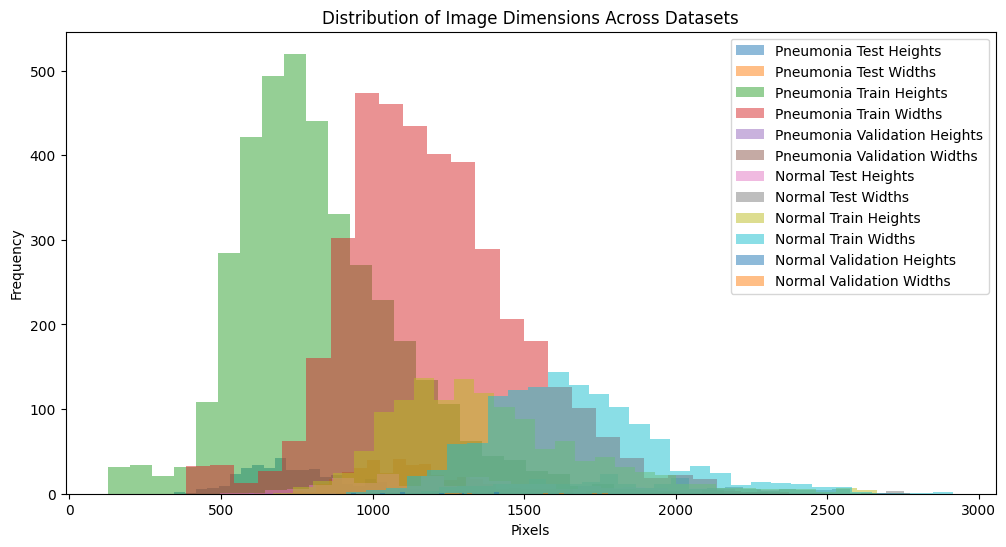

In [ ]:
# seems like it works, now we can do this for each sample we've globbed
#disclosure: chatgpt used for help here
import os

dims_dict = {}

for sample, name in zip(samples, sample_names):
    dims_dict[name] = []
    
    for image_path in sample:  
        dims = get_unique_dims(image_path)
        if dims:
            dims_dict[name].append(dims)  


hist_data = {k: np.array(v) for k, v in dims_dict.items()}


plt.figure(figsize=(12, 6))

for name, dims in hist_data.items():
    if len(dims) > 0:
        plt.hist(dims[:, 0], bins=30, alpha=0.5, label=f"{name} Heights")  # Heights
        plt.hist(dims[:, 1], bins=30, alpha=0.5, label=f"{name} Widths")   # Widths

plt.legend()
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.title("Distribution of Image Dimensions Across Datasets")
plt.show()





### This means we have to clean our dataset to make sure each image is the same size

## Lets check for corrupted images: